# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Brittany Dowdle

### **[Clickable link to GitHub Repo](https://github.com/Bdowdle4/bd-web-scraping)**

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.
***

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   VersionAll prereqs installed.

------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm    

***
### **Question 1**

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
import pickle

# URL of the archived article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    # Fetch the HTML content
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for HTTP errors
    html_content = response.text

    # Save the HTML content to a .pkl file
    with open("article.pkl", "wb") as file:
        pickle.dump(html_content, file)

    print("HTML content saved to 'article.pkl'.")

    # (Optional) Save the content to a .html file for easier viewing
    with open("article.html", "w", encoding="utf-8") as html_file:
        html_file.write(html_content)

    print("HTML content also saved to 'article.html'.")
except Exception as e:
    print(f"An error occurred: {e}")
    

HTML content saved to 'article.pkl'.
HTML content also saved to 'article.html'.


### **Question 2**

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class (example uses 'article-content')
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
    print("Article Text:\n")
    print(article_text)
else:
    print("Could not find the article content.")

Article Text:

When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!Laser Headlights?!BWM’s prototype laser headlight assemblies undergoing testing.The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work 

### **Question 3**

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude stopwords, punctuation, and whitespace
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequencies of the tokens
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("Top 5 most frequent tokens in the article (excluding punctuation, stopwords, and whitespace):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 most frequent tokens in the article (excluding punctuation, stopwords, and whitespace):
Token: 'laser', Frequency: 29
Token: 'headlights', Frequency: 16
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10
Token: 'headlight', Frequency: 9


### **Question 4**

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude stopwords, punctuation, and whitespace, and use lemmas
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequencies of the lemmas
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Top 5 most frequent lemmas in the article (excluding punctuation, stopwords, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 most frequent lemmas in the article (excluding punctuation, stopwords, and whitespace):
Lemma: 'laser', Frequency: 33
Lemma: 'headlight', Frequency: 25
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


### **Question 5**

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
import pickle
from bs4 import BeautifulSoup
import spacy

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring methods
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence by tokens.
    :param sentence: The sentence to score.
    :param interesting_tokens: List of interesting tokens.
    :return: The score of the sentence.
    """
    tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence by lemmas.
    :param sentence: The sentence to score.
    :param interesting_lemmas: List of interesting lemmas.
    :return: The score of the sentence.
    """
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Use the frequent Tokens/lemmas identified in the previous steps
interesting_tokens = ['laser','headlights','technology','led','headlight']
interesting_lemmas = ['laser','headlight','beam','technology','led']

# Process the first sentence
first_sentence = list(doc.sents)[0]

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print the results
print(f"First Sentence: {first_sentence.text}")
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

First Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token Score: 0.2
Lemma Score: 0.2


### **Question 6**

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

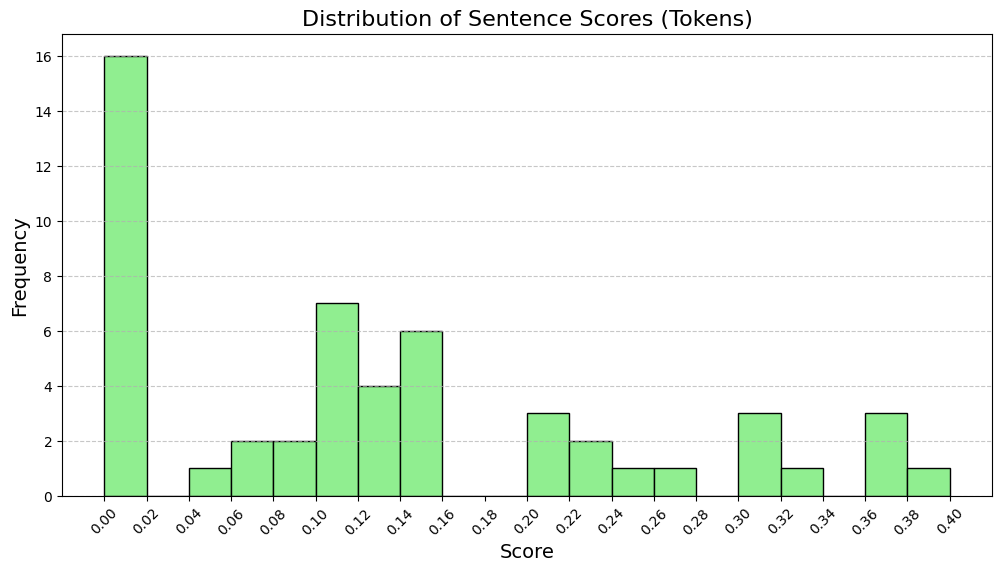

In [12]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring method
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence by tokens.
    :param sentence: The sentence to score.
    :param interesting_tokens: List of interesting tokens.
    :return: The score of the sentence.
    """
    tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

# Interesting tokens for scoring
interesting_tokens = ['laser','headlights','technology','led','headlight']

# Calculate scores for every sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents]

# Define bin edges from scores with intervals of 0.02
bin_edges = np.arange(0, max(scores) + 0.02, 0.02)

# Plot the histogram
plt.figure(figsize=(12, 6))  # Make the histogram wider
plt.hist(scores, bins=bin_edges, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentence Scores (Tokens)', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)  # Set x-ticks to match bin intervals
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation Comment: The most common range of scores appears to be between 0.00 and 0.02.
# Indicating that most sentences in the article have few mentions of the interesting tokens relative to their total length.


### **Question 7**

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

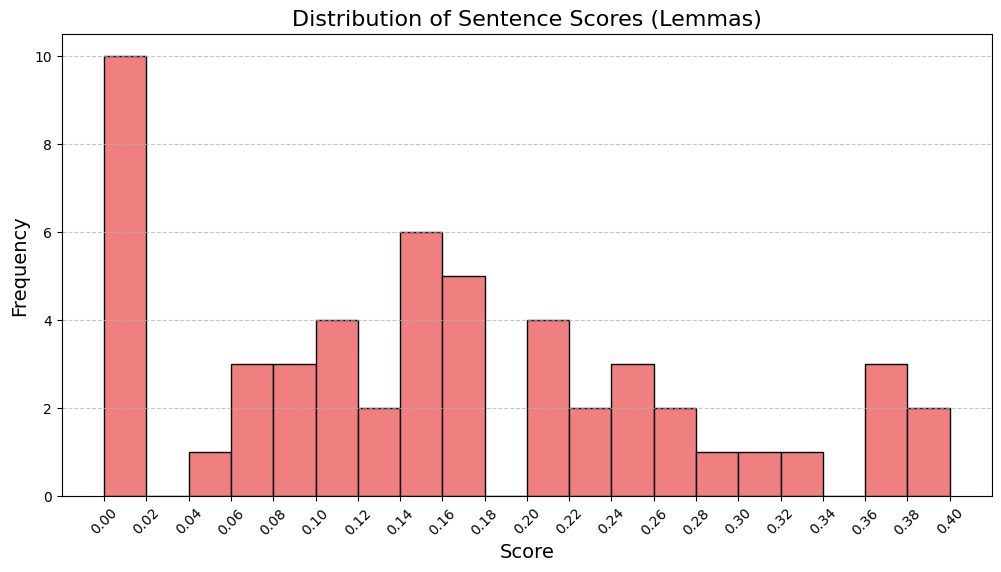

In [13]:
import pickle
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
import numpy as np

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring method using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence by lemmas.
    :param sentence: The sentence to score.
    :param interesting_lemmas: List of interesting lemmas.
    :return: The score of the sentence.
    """
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Interesting lemmas for scoring
interesting_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

# Calculate scores for every sentence
scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents]

# Define bin edges from scores with intervals of 0.02
bin_edges = np.arange(0, max(scores) + 0.02, 0.02)

# Plot the histogram
plt.figure(figsize=(12, 6))  # Make the histogram wider
plt.hist(scores, bins=bin_edges, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sentence Scores (Lemmas)', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)  # Set x-ticks to match bin intervals
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation Comment: The most common range of scores appears to be between 0.0 and 0.2.
# Indicating that most sentences in the article have few mentions of the interesting lemmas relative to their total length.
# I also did a quick google check to verify!


### **Question 8**

Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

>The token that would be discarded is 'headlights' if you go off of spaCy and the token.pos_ == 'NOUN' code. I ran this below to figure out what the "officical" answer would be. This is due to being a plural noun. When you run the code for the lemmas all of the words are kept due to plurals being grouped into the base or root word.
>
>Original code example:
>
```tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct]```
>
>Updated code example:
>
> 
~~~
nouns = [ ]
    for word in interesting_tokens:
         if any(word == token.lemma_ and token.pos_ == 'NOUN' for token in doc):
            nouns.append(word)
~~~

***
Verifying # 8

In [9]:
import pickle
from bs4 import BeautifulSoup
import spacy

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Interesting tokens to check
interesting_tokens = ['laser', 'headlights', 'technology', 'led', 'headlight']

# Filter which of these tokens are nouns based on their lemma
nouns = []
for word in interesting_tokens:
    # Check if the word lemma is a noun
    if any(word == token.lemma_ and token.pos_ == 'NOUN' for token in doc):
        nouns.append(word)

# Print discarded tokens (not nouns)
discarded_tokens = [word for word in interesting_tokens if word not in nouns]
print("Discarded tokens (not nouns):", discarded_tokens)


Discarded tokens (not nouns): ['headlights']


In [10]:
import pickle
from bs4 import BeautifulSoup
import spacy

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Interesting lemmas to check
interesting_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

# Filter which of these lemmas are nouns
nouns = []
for lemma in interesting_lemmas:
    # Check if any token with this lemma is a noun
    if any(lemma == token.lemma_ and token.pos_ == 'NOUN' for token in doc):
        nouns.append(lemma)

# Print discarded lemmas (not nouns)
discarded_lemmas = [lemma for lemma in interesting_lemmas if lemma not in nouns]
print("Discarded lemmas (not nouns):", discarded_lemmas)

Discarded lemmas (not nouns): []


In [11]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 445462 bytes to web-scraping.html
